# CS 418: Introduction to Data Science
**Final Project - Fall 2020**

#### Instructions
**This assignment is due Monday, November 30, at 11:59PM (Central Time).
For this assignment, you must work in teams of three students. Each member of the
team must be assigned one of three roles (project manager, scribe, or timekeeper) and
everyone must switch roles in every project.
Deliverables for this assignment (see Deliverables section below) must be submitted
on Blackboard by the project manager. Only one submission per team is required.
Additionally, every member of the team must submit a self- and peer-evaluation form.
No late submissions will be accepted for the final project.
Offering or receiving any kind of unauthorized or unacknowledged assistance is a
violation of the University’s academic integrity policies, will result in a grade of zero for
the assignment, and will be subject to disciplinary action.**

#### Project Description
**For this project, you will implement every step of the data science pipeline for a problem of your
choice. You must perform each of the following tasks:**

**1. <u>Problem Selection.</u> Identify a real-world problem (for example, predicting the number of
votes cast for the Democratic and the Republican parties in each county during the 2018
United States Senate elections) and propose a data science solution (for example,
building linear regression models). <i>Describe your problem and your solution.</i>**

With the COVID-19 pandemic still going on, the United States continues to struggle with reducing their number of confirmed COVID-19 cases in the country. Currently, the United States has the most confirmed cases and most deaths in the world. While some counties seem to be doing fine with the pandemic, the popular counties such as Los Angeles or Cook County seem to be struggling to keep the virus contained. Therefore, we need to find a way where we can accurately keep track of this data so the public can get educated in the numbers of cases and deaths. The problem we are trying to solve is to limit the number of cases in counties of the United States since COVID-19 is increasing at a fast rate and doesn’t seem to be slowing down for the country. We would try to solve this problem by taking a look at up-to-date data on COVID-19 confirmed cases and deaths of counties in the United States. These numbers would then be able to determine the steps the counties need to take to prevent the increase of cases. In order to solve this problem, we first need to do cluster analysis. This is going to allow us to divide observations into clusters such that observations within a group are similar to one another, and different from observations in other groups. The cluster analysis is going to help identify meaningful groups of observations that share common characteristics. When we do cluster our different datasets, we then will use useful clusters that can be used to summarize data. Secondly, for our data we will use time series analysis to understand the underlying process that produced the COVID-19 data. Being able to forecast future values of the time series by the use of components such as level, trend, seasonality, and noise. These components will help the understanding of the data.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from lib import *
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler   
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import linear_model
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, distance
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn import metrics
from random import random
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

**2. <u>Data Collection.</u> Identify one or more datasets relevant to your problem. <i>Describe your
datasets.</i>**

In [3]:
# this dataset is continuously being updated everyday, the COVID datasets we are using is up until November 23th
confirmed_cases = pd.read_csv('covid_confirmed_usafacts.csv')
confirmed_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,978,986,993,1004,1008,1011,1024,1036,1136,1142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,1075,1075,1110,1151,1224,1269,1353,1353,1421,1548
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,1178,1178,1192,1252,1271,1298,1336,1336,1371,1433
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,729,729,760,796,835,869,894,894,920,950
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,218,218,227,253,263,274,290,290,315,325


In [4]:
# this dataset is continuously being updated everyday, the COVID datasets we are using is up until November 23th
deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,36,36,36,37,37,39,39,39,39,39
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,84,84,84,84,84,84,84,84,84,84
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,9,9,9,9,10,10,10,10,10,10
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4,4,4,4,4,6,6,6,6,6
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [5]:
# this dataset is continuously being updated everyday, the COVID datasets we are using is up until November 23th
population = pd.read_csv('covid_county_population_usafacts.csv')
population

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


**3. <u>Data Preparation.</u> Detect and correct data quality problems (missing data, noise,
outliers, etc.) and transform the data into an appropriate format for data analysis.
<i>Describe your data preparation process and report the results obtained.</i>**

Since we are planning to use clustering and time analysis for our data modeling, we will create three separate datasets from the COVID-19 datasets.<br>
<br>• The first dataset will contain the total population, confirmed cases, and deaths of all counties. <br>**This will be used for the data exploration and the clustering part for data modeling.**<br> <br>
• The second dataset will show a day-to-day dataset for all the states that have been confirmed cases of COVID-19. <br>**This will be used for the time analysis part for data modeling.**<br> <br>
• The third dataset will show a day-to-day dataset for all the states that have been confirmed death cases from COVID-19. <br>**This will be used for the time analysis part for data modeling.**<br><br>

**Dataset 1 - Total Population, Confirmed COVID-19 Cases, Confirmed Deaths of all counties**

In [6]:
confirmed_cases['Confirmed Cases']= confirmed_cases['11/23/20']
confirmed_cases.drop(confirmed_cases.iloc[:, -308:-1], inplace = True, axis = 1)
confirmed_cases

,countyFIPS,County Name,State,stateFIPS,Confirmed Cases
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,2634
2,1003,Baldwin County,AL,1,8269
3,1005,Barbour County,AL,1,1161
4,1007,Bibb County,AL,1,1142
...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,1548
3191,56039,Teton County,WY,56,1433
3192,56041,Uinta County,WY,56,950
3193,56043,Washakie County,WY,56,325


In [7]:
deaths['Deaths']= deaths['11/23/20']
deaths.drop(deaths.iloc[:, -308:-1], inplace = True, axis = 1)
deaths

,countyFIPS,County Name,State,stateFIPS,Deaths
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,39
2,1003,Baldwin County,AL,1,84
3,1005,Barbour County,AL,1,10
4,1007,Bibb County,AL,1,17
...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,6
3191,56039,Teton County,WY,56,2
3192,56041,Uinta County,WY,56,4
3193,56043,Washakie County,WY,56,7


In [8]:
# removes rows that didn't have a population
merged_data = population.merge(confirmed_cases, how = 'inner', on=['State', 'County Name', 'countyFIPS'], sort = False)
merged_data

,countyFIPS,County Name,State,population,stateFIPS,Confirmed Cases
0,0,Statewide Unallocated,AL,0,1,0
1,1001,Autauga County,AL,55869,1,2634
2,1003,Baldwin County,AL,223234,1,8269
3,1005,Barbour County,AL,24686,1,1161
4,1007,Bibb County,AL,22394,1,1142
...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,42343,56,1548
3189,56039,Teton County,WY,23464,56,1433
3190,56041,Uinta County,WY,20226,56,950
3191,56043,Washakie County,WY,7805,56,325


In [9]:
# removes rows that didn't have a population
merged_data = merged_data.merge(deaths, how = 'inner', on=['State', 'County Name', 'countyFIPS', 'stateFIPS'], sort = False)
merged_data

,countyFIPS,County Name,State,population,stateFIPS,Confirmed Cases,Deaths
0,0,Statewide Unallocated,AL,0,1,0,0
1,1001,Autauga County,AL,55869,1,2634,39
2,1003,Baldwin County,AL,223234,1,8269,84
3,1005,Barbour County,AL,24686,1,1161,10
4,1007,Bibb County,AL,22394,1,1142,17
...,...,...,...,...,...,...,...
3173,56037,Sweetwater County,WY,42343,56,1548,6
3174,56039,Teton County,WY,23464,56,1433,2
3175,56041,Uinta County,WY,20226,56,950,4
3176,56043,Washakie County,WY,7805,56,325,7


In [10]:
# organizing the first dataset
merged_data = merged_data[['State', 'County Name', 'countyFIPS', 'stateFIPS', 'population', 'Confirmed Cases', 'Deaths']]
merged_data.rename(columns = {'County Name':'County', 'population':'Population'}, inplace = True)
merged_data['State'] = merged_data['State'].map(abbrev_us_state)
merged_data

,State,County,countyFIPS,stateFIPS,Population,Confirmed Cases,Deaths
0,Alabama,Statewide Unallocated,0,1,0,0,0
1,Alabama,Autauga County,1001,1,55869,2634,39
2,Alabama,Baldwin County,1003,1,223234,8269,84
3,Alabama,Barbour County,1005,1,24686,1161,10
4,Alabama,Bibb County,1007,1,22394,1142,17
...,...,...,...,...,...,...,...
3173,Wyoming,Sweetwater County,56037,56,42343,1548,6
3174,Wyoming,Teton County,56039,56,23464,1433,2
3175,Wyoming,Uinta County,56041,56,20226,950,4
3176,Wyoming,Washakie County,56043,56,7805,325,7


**Dataset 2 - Day-to-day dataset for all the states that have been confirmed cases of COVID-19.**

In [11]:
confirmed_cases2 = pd.read_csv('covid_confirmed_usafacts.csv')
population2 = pd.read_csv('covid_county_population_usafacts.csv')
deaths2 = pd.read_csv('covid_deaths_usafacts.csv')

In [12]:
#Confirmed cases 
confirmed_cases2.rename(columns = {'County Name':'County', 'population':'Population'}, inplace = True)
confirmed_cases2['State'] = confirmed_cases2['State'].map(abbrev_us_state)

#Death cases
population2.rename(columns = {'County Name':'County', 'population':'Population'}, inplace = True)
population2['State'] = population2['State'].map(abbrev_us_state)

#Population 
deaths2.rename(columns = {'County Name':'County', 'population':'Population'}, inplace = True)
deaths2['State'] = deaths2['State'].map(abbrev_us_state)

In [13]:
confirmed_cases2.head()

,countyFIPS,County,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,0,Statewide Unallocated,Alabama,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,Alabama,1,0,0,0,0,0,0,...,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634
2,1003,Baldwin County,Alabama,1,0,0,0,0,0,0,...,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269
3,1005,Barbour County,Alabama,1,0,0,0,0,0,0,...,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161
4,1007,Bibb County,Alabama,1,0,0,0,0,0,0,...,978,986,993,1004,1008,1011,1024,1036,1136,1142


In [14]:
confirmed_cases2.drop(['countyFIPS','County','stateFIPS'], inplace = True, axis = 1)
confirmed_cases2.groupby('State').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,215843,217822,219232,220846,223486,225910,228373,230708,232506,234080
Alaska,0,0,0,0,0,0,0,0,0,0,...,22014,22660,23240,23240,23240,25192,25192,25192,25934,25934
Arizona,0,0,0,0,1,1,1,1,1,1,...,273053,275435,276912,279896,283102,287225,291696,295334,299665,302324
Arkansas,0,0,0,0,0,0,0,0,0,0,...,132163,133039,134346,135902,137617,139855,141916,143821,145173,146190
California,0,0,0,0,2,3,3,4,4,4,...,1023575,1030112,1043361,1053997,1065434,1079871,1086478,1103363,1108791,1130804
Colorado,0,0,0,0,0,0,0,0,0,0,...,159233,163416,167711,172043,176694,182800,188566,194676,198599,202289
Connecticut,0,0,0,0,0,0,0,0,0,0,...,88645,88645,93284,94986,97028,99381,101469,101469,101469,106740
Delaware,0,0,0,0,0,0,0,0,0,0,...,28396,28803,29208,29552,29775,30167,30816,31322,31848,31849
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,18814,18977,19064,19309,19465,19678,19808,19961,20151,20290


**Dataset 3 - Day-to-day dataset for all the states that have been confirmed deaths from COVID-19.**

In [15]:
deaths2.drop(['countyFIPS','County','stateFIPS'], inplace = True, axis = 1)
deaths2.groupby('State').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,3244,3246,3247,3298,3344,3415,3448,3457,3457,3459
Alaska,0,0,0,0,0,0,0,0,0,0,...,98,98,98,98,98,98,98,98,98,98
Arizona,0,0,0,0,0,0,0,0,0,0,...,6299,6301,6301,6312,6364,6383,6427,6456,6464,6464
Arkansas,0,0,0,0,0,0,0,0,0,0,...,2158,2183,2225,2245,2275,2297,2321,2337,2357,2387
California,0,0,0,0,0,0,0,0,0,0,...,18252,18263,18303,18357,18457,18527,18563,18598,18720,18769
Colorado,0,0,0,0,0,0,0,0,0,0,...,2524,2545,2577,2608,2651,2729,2745,2787,2806,2810
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4737,4737,4759,4771,4784,4805,4828,4828,4828,4871
Delaware,0,0,0,0,0,0,0,0,0,0,...,736,736,737,739,739,744,746,748,752,752
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,658,660,660,660,665,667,669,670,670,672


**4. <u>Data Exploration.</u> Explore the data using summary statistics and plots and identify the
most important variables for data analysis. <i>Describe your data exploration process and
report the results obtained.</i>**

In [16]:
deaths_b= merged_data.groupby('County')['Deaths'].describe()

# don't display the columns with NaN values in std
deaths_b = deaths_b[deaths_b['std'].notna()]

# transpose the columns rows
deaths_t = deaths_b.T
print(deaths_t)

County  Adair County  Adams County  Albany County  Alexander County  \
count       4.000000     12.000000       2.000000          2.000000   
mean       11.250000     44.000000      72.500000          8.500000   
std         8.883505     87.417494      89.802561          9.192388   
min         3.000000      0.000000       9.000000          2.000000   
25%         5.250000      5.000000      40.750000          5.250000   
50%         9.500000     16.000000      72.500000          8.500000   
75%        15.500000     43.500000     104.250000         11.750000   
max        23.000000    316.000000     136.000000         15.000000   

County  Allegany County  Alleghany County  Allen County  Anderson County  \
count          2.000000          2.000000      4.000000         5.000000   
mean          52.000000          4.000000    100.250000        58.600000   
std            4.242641          4.242641    139.521504        92.753976   
min           49.000000          1.000000      1.000000 

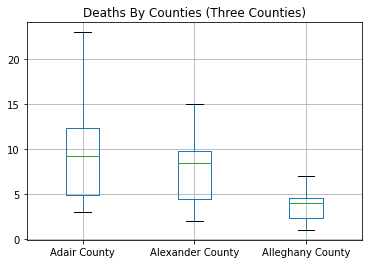

In [17]:
#deaths in counties (displaying three counties)
plt.title("Deaths By Counties (Three Counties)")
boxplot = deaths_t.boxplot(column=['Adair County', 'Alexander County', 'Alleghany County'])

In [18]:
population_b = merged_data.groupby('County')['Population'].describe()
population_b
population_t = population_b.T
print(population_t)

County  Abbeville County  Acadia Parish  Accomack County  Ada County  \
count                1.0            1.0              1.0         1.0   
mean             24527.0        62045.0          32316.0    481587.0   
std                  NaN            NaN              NaN         NaN   
min              24527.0        62045.0          32316.0    481587.0   
25%              24527.0        62045.0          32316.0    481587.0   
50%              24527.0        62045.0          32316.0    481587.0   
75%              24527.0        62045.0          32316.0    481587.0   
max              24527.0        62045.0          32316.0    481587.0   

County  Adair County   Adams County  Addison County  Aiken County  \
count       4.000000      12.000000             1.0           1.0   
mean    18472.750000   71809.250000         36777.0      170872.0   
std      7952.761004  143195.869372             NaN           NaN   
min      7152.000000    2216.000000         36777.0      170872.0   
25%   

In [19]:
confirmed_cases_b = merged_data.groupby('County')['Confirmed Cases'].describe()
#dont display columns with nan values in std
confirmed_cases_b = confirmed_cases_b[confirmed_cases_b['std'].notna()]
#transpose the columns rows
confirmed_cases_t = confirmed_cases_b.T
print(confirmed_cases_t)

County  Adair County  Adams County  Albany County  Alexander County  \
count       4.000000     12.000000       2.000000          2.000000   
mean      817.250000   3412.583333    4053.000000        861.000000   
std       334.679324   7353.960794    1548.563851        872.569768   
min       408.000000     89.000000    2958.000000        244.000000   
25%       617.250000    602.000000    3505.500000        552.500000   
50%       859.500000   1326.000000    4053.000000        861.000000   
75%      1059.500000   1815.000000    4600.500000       1169.500000   
max      1142.000000  26474.000000    5148.000000       1478.000000   

County  Allegany County  Alleghany County  Allen County  Anderson County  \
count          2.000000          2.000000      4.000000         5.000000   
mean        1674.500000        328.000000   5731.000000      2849.000000   
std         1157.533801         67.882251   7976.080031      2932.717596   
min          856.000000        280.000000    313.000000 

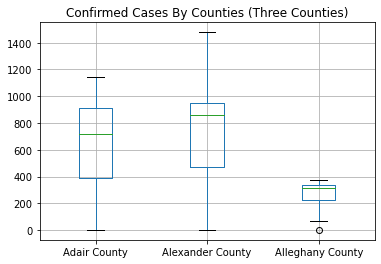

In [20]:
#deaths in counties (displaying three counties)
plt.title("Confirmed Cases By Counties (Three Counties)")
boxplot = confirmed_cases_t.boxplot(column=['Adair County', 'Alexander County', 'Alleghany County'])

In [21]:
confirmed_data = confirmed_cases.groupby('State').sum()
sort_confirmed = confirmed_data.sort_values(by=['Confirmed Cases'], ascending = False)
sort_confirmed

,countyFIPS,stateFIPS,Confirmed Cases
State,,,
CA,357364,360,1130804
TX,12256516,12240,1114307
FL,808550,816,944745
IL,1744404,1751,664603
NY,2235845,2304,602189
GA,2092677,2080,406220
WI,3965119,4015,379693
OH,3439744,3471,363304
TN,4474025,4512,344550


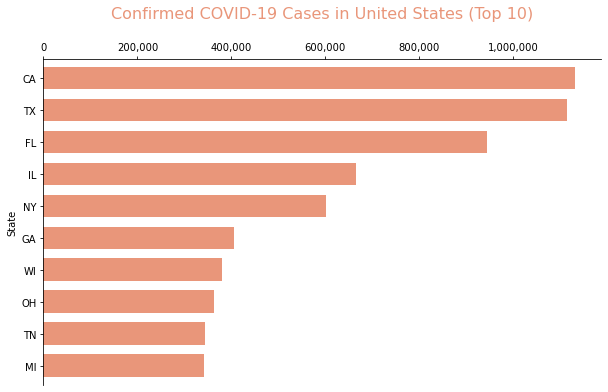

In [22]:
ax = sort_confirmed.iloc[:, -1].head(10).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darksalmon')
ax.set_title('Confirmed COVID-19 Cases in United States (Top 10)\n', fontsize=16,loc='center', color = 'darksalmon')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

In [23]:
deaths_data = deaths.groupby('State').sum()
sort_deaths = deaths_data.sort_values(by=['Deaths'], ascending = False)
sort_deaths

,countyFIPS,stateFIPS,Deaths
State,,,
NY,2235845,2304,33922
TX,12256516,12240,20574
CA,357364,360,18769
FL,808550,816,18085
NJ,714441,748,16772
IL,1744404,1751,11552
MA,350196,375,10531
PA,2818489,2856,9870
MI,2164889,2184,8940


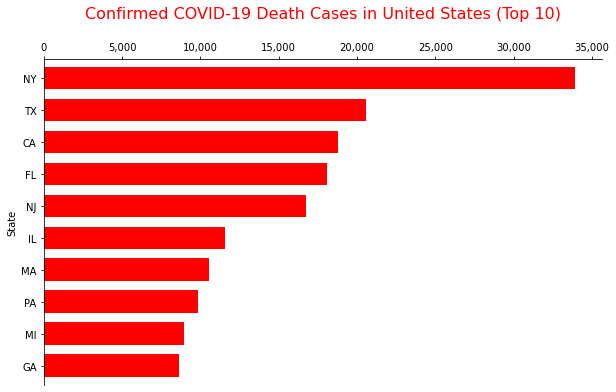

In [24]:
ax = sort_deaths.iloc[:, -1].head(10).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='red')
ax.set_title('Confirmed COVID-19 Death Cases in United States (Top 10)\n', fontsize=16,loc='center', color = 'red')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

In [25]:
deaths_data = deaths.groupby('State').sum()
sort_deaths = deaths_data.sort_values(by=['Deaths'], ascending = False)
deaths_t = sort_deaths.T
death_cases_cleanup = deaths_t.drop(['countyFIPS',])
print(death_cases_cleanup)

State         NY     TX     CA     FL     NJ     IL     MA    PA    MI    GA  \
stateFIPS   2304  12240    360    816    748   1751    375  2856  2184  2080   
Deaths     33922  20574  18769  18085  16772  11552  10531  9870  8940  8644   

State      ...   DE   DC    WV    MT   NH   HI    WY   ME  AK   VT  
stateFIPS  ...   40   11  3024  1710  363   90  1344  391  62  750  
Deaths     ...  752  672   667   616  512  233   202  189  98   63  

[2 rows x 51 columns]


Text(0.5, 1.0, 'COVID-19 Death Cases by State (Top 3)')

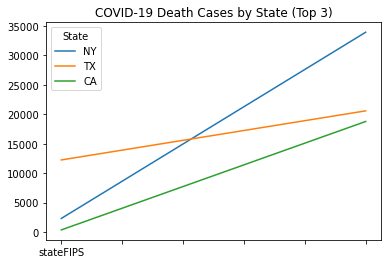

In [26]:
states = ['NY','TX','CA']
plot = death_cases_cleanup[states].plot()
plot.set_title("COVID-19 Death Cases by State (Top 3)")

In [27]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

merged_data['countyFIPS'] = merged_data['countyFIPS'].apply(lambda x: str(x).zfill(3))

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

endpts = list(np.linspace(1, 6500, len(colorscale) - 1))
fips = merged_data['countyFIPS'].tolist()
values = merged_data['Confirmed Cases'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    state_outline={'color': 'black', 'width': 0.5},
    asp=2.9, title='COVID-19 United States Cases by County',
    legend_title='# of Cases'
)

fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [28]:
merged_data['countyFIPS'] = merged_data['countyFIPS'].apply(lambda x: str(x).zfill(3))
merged_data['FIPS'] = merged_data['countyFIPS']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

endpts = list(np.linspace(1, 300, len(colorscale) - 1))
fips = merged_data['countyFIPS'].tolist()
values = merged_data['Deaths'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    state_outline={'color': 'black', 'width': 0.5},
    asp=2.9, title='Confirmed COVID-19 Death Cases in United States',
    legend_title='# of deaths'
)

fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


**5. <u>Data Modeling.</u> Train and test models using the data. Your data modeling step must
include at least two of the following tasks: (1) Regression, (2) Classification,
(3) Clustering, and (4) Text analysis. Consider multiple techniques, parameters, and
variables. <i>Describe your data modeling process and report the results obtained.</i>**

For our data modeling, we will be using clustering and time analysis. <br>

**Clustering**

In [29]:
# Created new dataset that that shows the total population, total confirmed cases, and deaths of states instead of counties
new_data = merged_data.groupby('State').sum()
new_data

,stateFIPS,Population,Confirmed Cases,Deaths
State,,,,
Alabama,68,4903185,234080,3459
Alaska,62,731545,25934,98
Arizona,64,7278717,302324,6464
Arkansas,380,3017804,146190,2387
California,360,39512223,1130804,18769
Colorado,512,5688271,200463,2762
Connecticut,81,3565287,106740,4871
Delaware,40,973764,31849,752
District of Columbia,11,705749,20290,672


In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   stateFIPS        51 non-null     int64
 1   Population       51 non-null     int64
 2   Confirmed Cases  51 non-null     int64
 3   Deaths           51 non-null     int64
dtypes: int64(4)
memory usage: 2.0+ KB


In [31]:
#Partition the dataset into attributes and true clusters
#We choose Confirmed cases and Deaths 
X1 = merged_data[['Confirmed Cases','Deaths']]
Y = merged_data['stateFIPS']

In [32]:
#standardize the attributes
scaler = StandardScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)

C:\Users\nalol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\nalol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\nalol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\nalol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\nalol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWar

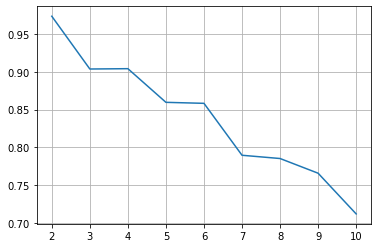

In [33]:
w = []
for k in np.arange(2, 11, 1):
  model = KMeans(n_clusters=k, n_jobs=-1).fit(X_scaled)
  preds = model.predict(X_scaled)
  silhouette = silhouette_score(X_scaled, preds)
  w.append(silhouette)
  
plt.plot(np.arange(2, 11, 1),w)
plt.grid()

**Hierarchical Clustering Dendogram**

In [34]:
clustering = linkage (X_scaled, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

In [35]:
#clusterin: 
hierarc_clustering = linkage(new_data, method = 'ward')

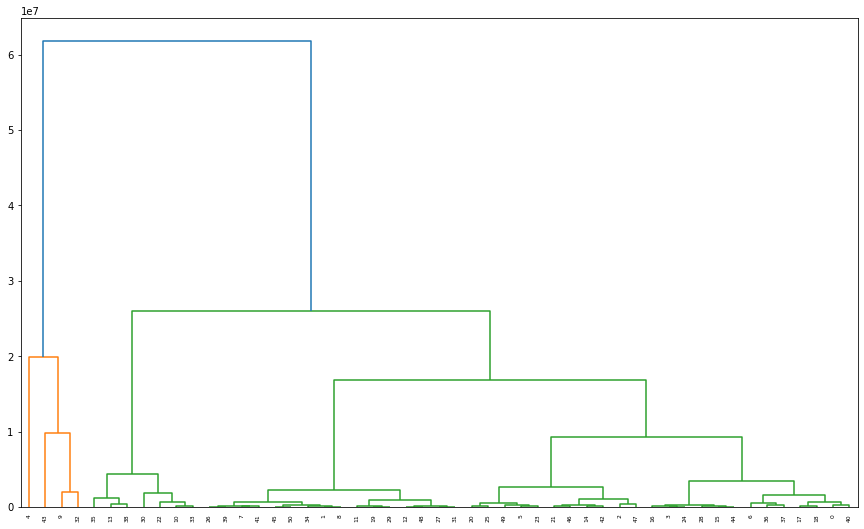

In [36]:
# Plot dendrogram
plt.figure(figsize = (15,9))
dendrogram(hierarc_clustering)
plt.show()

In [37]:
# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(merged_data['stateFIPS'], clusters))
print(metrics.silhouette_score(X1, clusters, metric = "euclidean"))

1.200024126954089e-05
0.9814938790550206


In [38]:
x = new_data[['stateFIPS','Confirmed Cases','Deaths']].values
print(x)

[[     68  234080    3459]
 [     62   25934      98]
 [     64  302324    6464]
 [    380  146190    2387]
 [    360 1130804   18769]
 [    512  200463    2762]
 [     81  106740    4871]
 [     40   31849     752]
 [     11   20290     672]
 [    816  944745   18085]
 [   2080  406220    8644]
 [     90   17333     233]
 [    720   91653     849]
 [   1751  664603   11552]
 [   1674  303860    5332]
 [   1900  211722    2205]
 [   2120  144029    1456]
 [   2541  160232    1792]
 [   1430  221160    6284]
 [    391   10799     189]
 [    600  183797    4494]
 [    375  212649   10531]
 [   2184  340964    8940]
 [   2349  276180    3262]
 [   2324  143879    3676]
 [   3364  278661    3783]
 [   1710   56381     616]
 [   2914  114962     929]
 [    576  135340    2018]
 [    363   18042     512]
 [    748  309588   16772]
 [   1155   71874    1236]
 [   2268  602189   33904]
 [   3737  339190    5039]
 [   2052   74401     846]
 [   3471  363304    6020]
 [   3120  177874    1649]
 

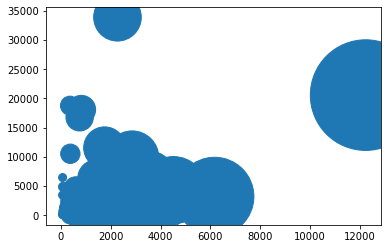

In [39]:
plt.scatter(x[:,0],x[:,2],s=x[:,0]);

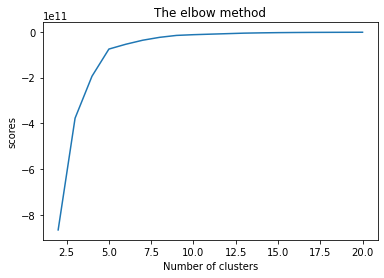

In [40]:
list = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    list.append(kmeans.score(x))
plt.plot(range(2,21),list)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.show()

In [41]:
list

[-866010655403.0653,
 -377306900584.1737,
 -193927871783.40085,
 -75153012374.86765,
 -54053568942.534325,
 -36433518878.67222,
 -23815232831.25556,
 -15387827116.241669,
 -12240518572.814285,
 -9917563078.047619,
 -7719869783.54762,
 -5495989684.7,
 -4233662914.616667,
 -3266808946.783333,
 -2668249696.9500003,
 -2222935555.4500003,
 -1974019347.95,
 -1738923180.6333334,
 -1550315768.5166667]

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 2 1 0 1 1 1 1 0 2 1 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 2 2 1 2 1
 1 2 1 1 1 2 0 1 1 1 1 1 2 1]


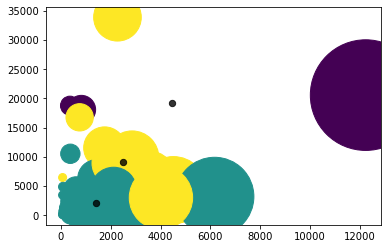

In [43]:
plt.scatter(x[:, 0], x[:, 2], c=y_kmeans, s=x[:,0],cmap="viridis")
cen = kmeans.cluster_centers_
plt.scatter(cen[:,0],cen[:,2],c="black",s=40,alpha=0.8);

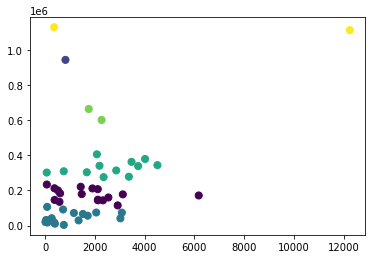

In [44]:
labels = KMeans(6, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis');

**From the graph above, we can see the centroids i.e; we see where they are after doing all this**

In [45]:
centroids=kmeans.cluster_centers_
centroids

array([[   4472.        , 1063285.33333333,   19142.66666667],
       [   1393.88235294,  111004.85294118,    2037.73529412],
       [   2505.21428571,  373266.21428571,    9063.85714286]])

**Visualize the data in scatterplots**

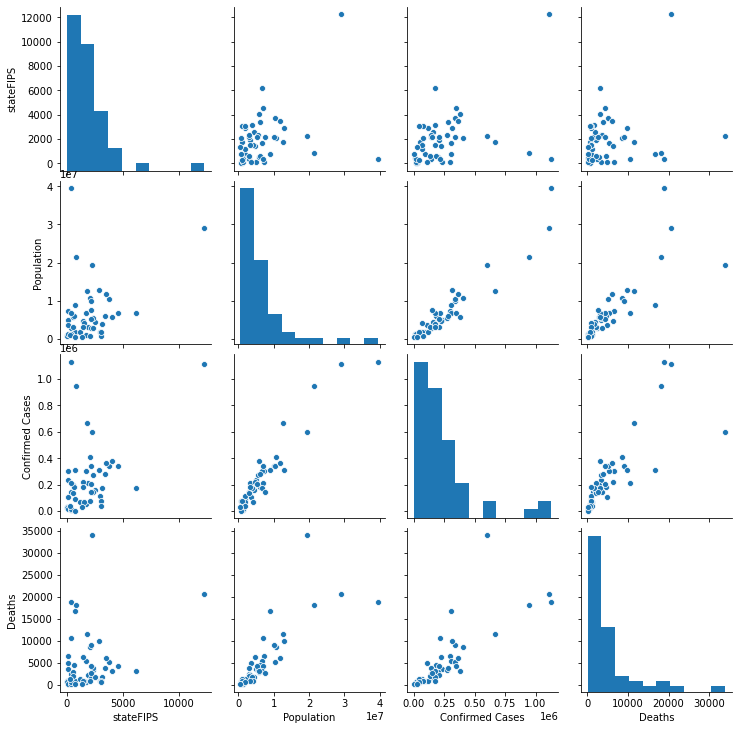

In [46]:
sns.pairplot(new_data, kind = "scatter")
plt.show()

**Time Analysis Forecasting**

**We will be using Dataset 2 - Confirmed Cases**

In [47]:
def aggregate_format_dataframe(df, label):
    
    
    # Aggregate the figures by Country
    df = df.groupby(['State']).sum()
    
    df = df.transpose()
    

    df = df[2:] 
    
    df.index = pd.to_datetime(df.index)
    df.index.name = 'Date'
    original_columns = df.columns
    df.columns = [x + ' ' + label for x in df.columns]
    
    return df, original_columns

In [48]:
df_confirmed_agg, confirmed_state = aggregate_format_dataframe(confirmed_cases2, 'confirmed')

states = confirmed_state

In [49]:
df_confirmed_agg.tail(5)

,Alabama confirmed,Alaska confirmed,Arizona confirmed,Arkansas confirmed,California confirmed,Colorado confirmed,Connecticut confirmed,Delaware confirmed,District of Columbia confirmed,Florida confirmed,...,South Dakota confirmed,Tennessee confirmed,Texas confirmed,Utah confirmed,Vermont confirmed,Virginia confirmed,Washington confirmed,West Virginia confirmed,Wisconsin confirmed,Wyoming confirmed
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-19,225910,25192,287225,139855,1079871,182800,99381,30167,19678,914333,...,69742,328088,1072898,166114,3310,210787,137410,37398,358110,26169
2020-11-20,228373,25192,291696,141916,1086478,188566,101469,30816,19808,923418,...,71070,331532,1085398,170677,3459,213330,139542,38477,365190,27129
2020-11-21,230708,25192,295334,143821,1103363,194676,101469,31322,19961,931827,...,72214,335886,1097945,174056,3545,215679,141260,39598,380316,27129
2020-11-22,232506,25934,299665,145173,1108791,198599,101469,31848,20151,937712,...,73062,340476,1107418,177192,3629,217796,141260,40478,384435,28169
2020-11-23,234080,25934,302324,146190,1130804,202289,106740,31849,20290,944745,...,73848,344550,1114307,179491,3714,221038,147537,41114,379693,29431


**We compare the data between 3 states: Illinois, New York and Texas.<br><br>
From the graph below, we can see that Texas gradually increases and then increases drastically after June and surpasses New York and Illinois in cases. However, Illinois and New York start off in cases at different points, and they end up having around the same confirmed case levels**

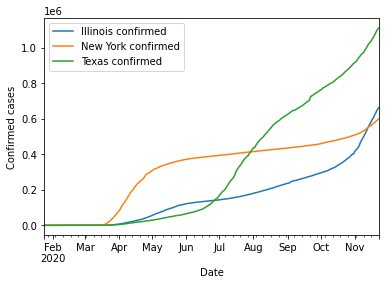

In [50]:
ax = df_confirmed_agg[['Illinois confirmed', 'New York confirmed', 'Texas confirmed']].plot()
ax.set_ylabel("Confirmed cases");

**The graph below is the same thing as we did above, but for all the states. Since there are a lot of states, however, it's a little difficult to tell which colors are for what state, which is why we did the graph above and picked out the states that had a lot of confirmed cases.**

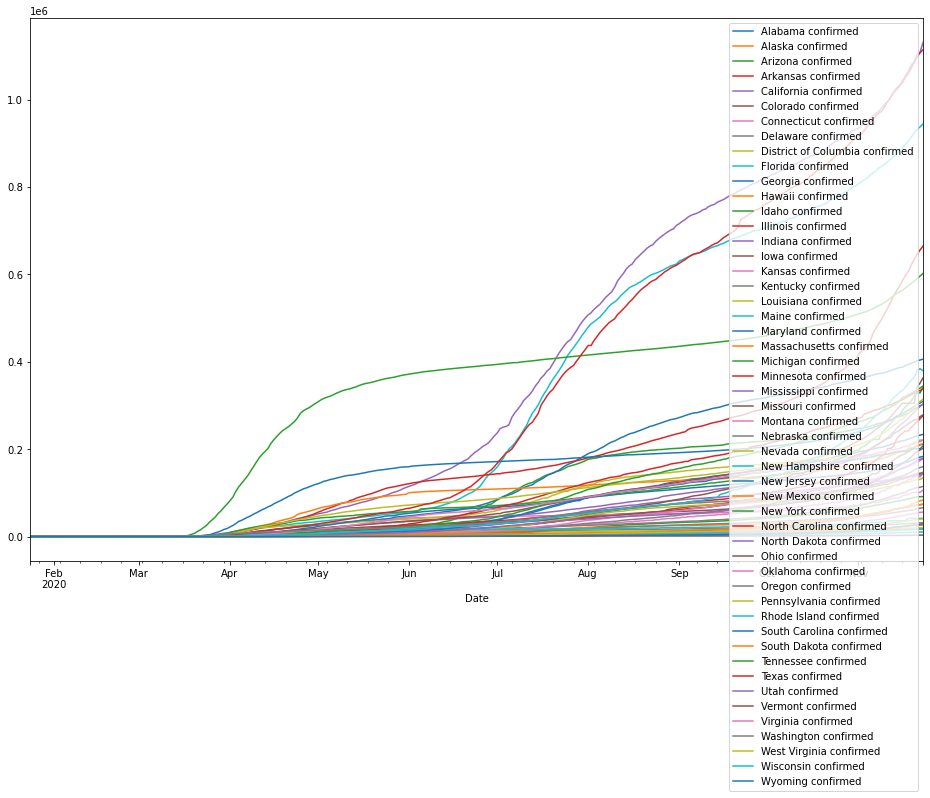

In [51]:
FIGSIZE=(16,10)
df_confirmed_agg.plot(figsize = FIGSIZE)

In [52]:
df_confirmed_agg['Confirmed']= df_confirmed_agg.apply(lambda row: row['Alaska confirmed' : 'Wyoming confirmed'].sum(),axis=1)
df_confirmed_agg.drop(df_confirmed_agg.iloc[:, 0:51], inplace = True, axis = 1)
df_confirmed_agg

,Confirmed
Date,
2020-01-24,2
2020-01-25,2
2020-01-26,5
2020-01-27,6
2020-01-28,6
...,...
2020-11-19,11337852
2020-11-20,11509479
2020-11-21,11714858


In [53]:
df_confirmed_agg2 = df_confirmed_agg.squeeze() # Convert to Series
df_confirmed_agg2.head()

Date
2020-01-24    2
2020-01-25    2
2020-01-26    5
2020-01-27    6
2020-01-28    6
Name: Confirmed, dtype: int64

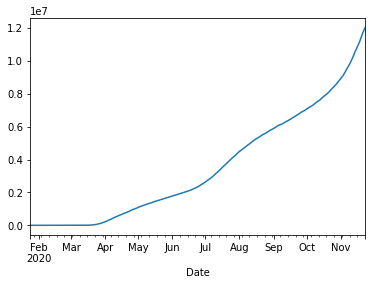

In [54]:
df_confirmed_agg2.plot()

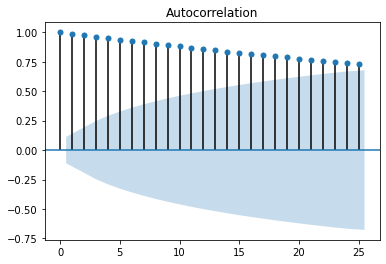

In [55]:
# Plot autocorrelation function
plot_acf(df_confirmed_agg, lags=25)
pyplot.show()

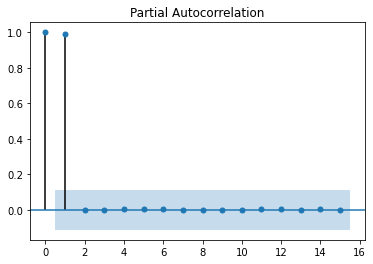

In [56]:
# Plot partial autocorrelation function
plot_pacf(df_confirmed_agg, lags=15)
pyplot.show()

**Method: Autoregression (AR)**
Model for univariate time series without trend and seasonal components.

In [57]:
# Fit model
p = 1 # Parameter of AR model
model = ARIMA(df_confirmed_agg, order = (p, 0, 0))
fitted_model = model.fit()
print(fitted_model.summary())

C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  305
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3770.226
Date:                Sun, 29 Nov 2020   AIC                           7546.451
Time:                        20:31:05   BIC                           7557.612
Sample:                    01-24-2020   HQIC                          7550.916
                         - 11-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.517e+06   7.78e-16   4.52e+21      0.000    3.52e+06    3.52e+06
ar.L1          1.0000   8.75e-05   1.14e+04      0.000       1.000       1.000
sigma2       1.99e+09   2.19e-17   9.07e+25      0.0

In [81]:
confirmed = df_confirmed_agg['Confirmed']
print("The table for all confirmed cases is ")
print(confirmed.head())

The table for all confirmed cases is 
Date
2020-01-24    2
2020-01-25    2
2020-01-26    5
2020-01-27    6
2020-01-28    6
Name: Confirmed, dtype: int64


In [82]:
MAConfirmed = ARIMA(np.array(confirmed),order=(2,1,0))
fitMAConfirmed = MAConfirmed.fit()
predictMAConfirmed = fitMAConfirmed.predict(1, len(confirmed)+20)
predMAConfirmed = np.round(predictMAConfirmed)
print(predMAConfirmed)

C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[4.0000000e+00 3.0000000e+00 7.0000000e+00 8.0000000e+00 6.0000000e+00
 8.0000000e+00 7.0000000e+00 9.0000000e+00 1.0000000e+01 9.0000000e+00
 1.2000000e+01 1.2000000e+01 1.1000000e+01 1.1000000e+01 1.1000000e+01
 1.1000000e+01 1.1000000e+01 1.1000000e+01 1.3000000e+01 1.2000000e+01
 1.4000000e+01 1.3000000e+01 1.3000000e+01 1.3000000e+01 1.3000000e+01
 1.5000000e+01 1.4000000e+01 1.4000000e+01 1.9000000e+01 1.8000000e+01
 1.7000000e+01 1.9000000e+01 1.8000000e+01 2.1000000e+01 2.2000000e+01
 2.5000000e+01 4.2000000e+01 4.8000000e+01 7.9000000e+01 1.0100000e+02
 1.4600000e+02 2.3800000e+02 2.8500000e+02 4.9100000e+02 6.1700000e+02
 9.6600000e+02 1.3130000e+03 1.6010000e+03 2.0770000e+03 2.8460000e+03
 3.5880000e+03 4.4930000e+03 5.6060000e+03 7.6370000e+03 1.1650000e+04
 1.8506000e+04 2.3967000e+04 3.2888000e+04 4.0853000e+04 5.2883000e+04
 6.3653000e+04 8.1340000e+04 1.0033600e+05 1.1903800e+05 1.4169000e+05
 1.6015200e+05 1.8360600e+05 2.0837600e+05 2.3729200e+05 2.6843900e+05
 3.084

In [60]:
plt.xlabel('States')
plt.ylabel('Cases')
plt.plot(confirmed, label='Confirmed', color='blue')
plt.plot(predictMAConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predictMAConfirmed[:len(predictMAConfirmed)-20], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

ValueError: view limit minimum -36887.6 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

**We will be using Dataset 3 - Death Cases**

In [61]:
def aggregate_format_dataframe2(df, label):
    
    
    # Aggregate the figures by Country
    df = df.groupby(['State']).sum()
    
    df = df.transpose()
    

    df = df[2:] 
    
    df.index = pd.to_datetime(df.index)
    df.index.name = 'Date'
    original_columns = df.columns
    df.columns = [x + ' ' + label for x in df.columns]
    
    return df, original_columns

In [62]:
df_death_agg, death_state = aggregate_format_dataframe2(deaths2, 'deaths')

states = death_state

In [63]:
df_death_agg.tail(5)

,Alabama deaths,Alaska deaths,Arizona deaths,Arkansas deaths,California deaths,Colorado deaths,Connecticut deaths,Delaware deaths,District of Columbia deaths,Florida deaths,...,South Dakota deaths,Tennessee deaths,Texas deaths,Utah deaths,Vermont deaths,Virginia deaths,Washington deaths,West Virginia deaths,Wisconsin deaths,Wyoming deaths
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-19,3415,98,6383,2297,18527,2729,4805,744,667,17810,...,705,4126,20097,759,61,3894,2603,623,2863,164
2020-11-20,3448,98,6427,2321,18563,2745,4828,746,669,17878,...,741,4201,20281,775,62,3910,2619,639,2951,164
2020-11-21,3457,98,6456,2337,18598,2787,4828,748,670,17930,...,741,4201,20281,775,62,3910,2619,639,2951,164
2020-11-22,3457,98,6464,2357,18720,2806,4828,752,670,17991,...,819,4266,20542,794,63,3938,2619,662,3005,164
2020-11-23,3459,98,6464,2387,18769,2810,4871,752,672,18085,...,819,4301,20574,798,63,3942,2655,667,3011,202


**We compare the data between 3 states: Illinois, New York and Texas.**<br>
 
**From the graph below, we can see that New York death rates increases drastically after April. However, Illinois and Texas start off in cases at different points, and they end up having relatively similar death levels.**

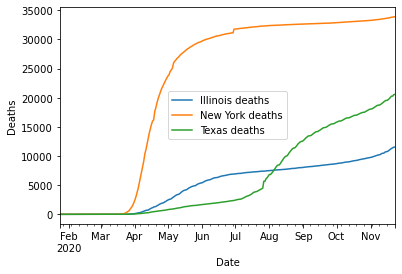

In [64]:
ax2 = df_death_agg[['Illinois deaths', 'New York deaths', 'Texas deaths']].plot()
ax2.set_ylabel("Deaths");

**The graph below is the same thing as we did above, but for all the states. Since there are a lot of states, however, it's a little difficult to tell which colors are for what state, which is why we did the graph above and picked out the states that had a lot of death cases.**

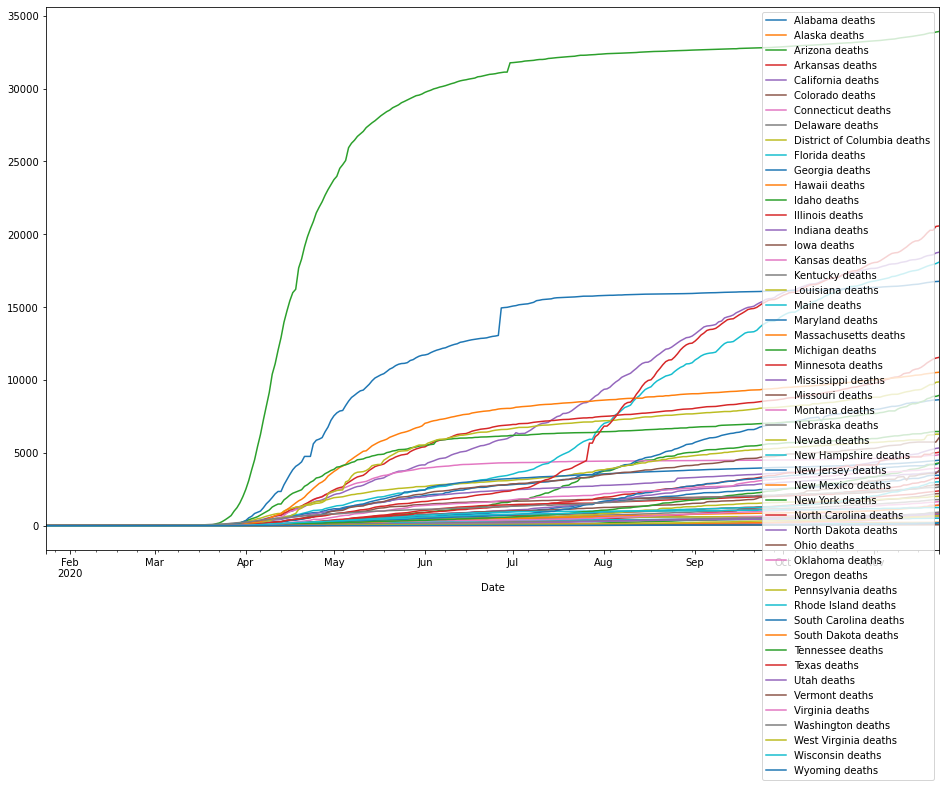

In [65]:
FIGSIZE=(16,10)
df_death_agg.plot(figsize = FIGSIZE)

In [66]:
df_death_agg['Deaths']= df_death_agg.apply(lambda row: row['Alaska deaths' : 'Wyoming deaths'].sum(),axis=1)
df_death_agg.drop(df_death_agg.iloc[:, 0:51], inplace = True, axis = 1)
df_death_agg

,Deaths
Date,
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
...,...
2020-11-19,245769
2020-11-20,247366
2020-11-21,248328


In [67]:
df_death_agg2 = df_death_agg.squeeze() # Convert to Series
df_death_agg.head()

,Deaths
Date,
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0


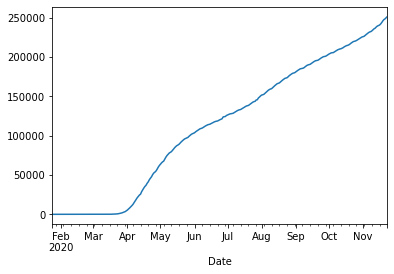

In [68]:
df_death_agg2.plot()

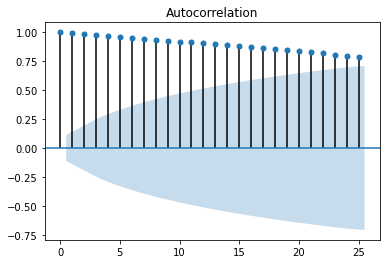

In [69]:
# Plot autocorrelation function
plot_acf(df_death_agg2, lags=25)
pyplot.show()

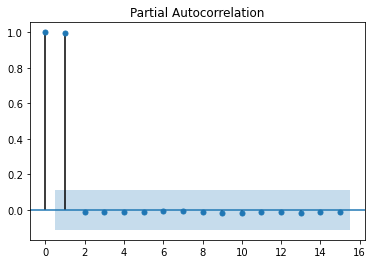

In [70]:
# Plot partial autocorrelation function
plot_pacf(df_death_agg2, lags=15)
pyplot.show()

**Method: Autoregression (AR):**
Model for univariate time series without trend and seasonal components.

In [71]:
# Fit model
p = 1 # Parameter of AR model
model = ARIMA(df_death_agg, order = (p, 0, 0))
fitted_model = model.fit()
print(fitted_model.summary())

C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nalol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                 Deaths   No. Observations:                  305
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2558.840
Date:                Sun, 29 Nov 2020   AIC                           5123.679
Time:                        20:32:08   BIC                           5134.840
Sample:                    01-24-2020   HQIC                          5128.143
                         - 11-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.125e+05   2.09e-13    5.4e+17      0.000    1.13e+05    1.13e+05
ar.L1          1.0000      0.001   1233.566      0.000       0.998       1.002
sigma2        1.1e+06   3.09e-12   3.56e+17      0.0

Here, we tried using ARIMA method.

In [72]:
#Confirmed
confirmed = new_data[['stateFIPS', 'Confirmed Cases']]
print("The table for all confirmed cases USA is ")
print(confirmed.head())

for index, row in confirmed.iterrows():
    if row['stateFIPS'] is None:
        row['Confirmed Cases'] = 0.0

The table for all confirmed cases USA is 
            stateFIPS  Confirmed Cases
State                                 
Alabama            68           234080
Alaska             62            25934
Arizona            64           302324
Arkansas          380           146190
California        360          1130804


In [73]:
MAConfirmed = ARIMA(np.array(confirmed['Confirmed Cases']),  order=(2,1,0))
fitMAConfirmed = MAConfirmed.fit()
predictMAConfirmed = fitMAConfirmed.predict(1, len(confirmed)+20)
predMAConfirmed = np.round(predictMAConfirmed)
print(predMAConfirmed)

[135510.  64442. 216731. 141246. 629435. 393268. 471676. 105423.  51925.
 428691. 398849. 416781. 180365. 317422. 314466. 384608. 213023. 173837.
 181455. 108663. 157097. 138364. 259114. 269553. 240030. 247257. 136163.
 156612. 104219.  77174. 184982. 107726. 383706. 309131. 311587. 289683.
 185207. 191297. 212316. 111895. 205831.  93442. 237173. 590531. 446919.
 416301. 136170. 104728. 109045. 224985. 112798. 183459. 115740. 130112.
 144756. 131697. 134127. 137143. 134631. 135032. 135649. 135167. 135231.
 135357. 135265. 135274. 135300. 135282. 135284. 135289. 135285.]


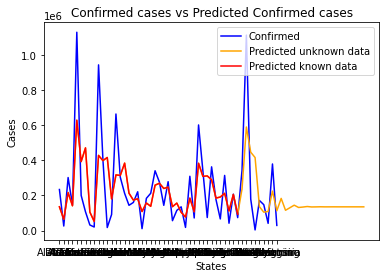

<Figure size 432x288 with 0 Axes>

In [80]:
plt.xlabel('States')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed Cases'], label='Confirmed', color='blue')
plt.plot(predictMAConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predictMAConfirmed[:len(predictMAConfirmed)-100], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()
plt.savefig('pt.png', dpi=200, bbox_inches='tight')

In [75]:
death = new_data[['stateFIPS', 'Deaths']]
print("The table for all death cases is ")
print(death.head())

for index, row in confirmed.iterrows():
    if row['stateFIPS'] is None:
        row['Deaths'] = 0.0

The table for all death cases is 
            stateFIPS  Deaths
State                        
Alabama            68    3459
Alaska             62      98
Arizona            64    6464
Arkansas          380    2387
California        360   18769


In [76]:
MADeaths = ARIMA(np.array(death['Deaths']),  order=(2,1,0))
fitMADeaths = MADeaths.fit()
predictMADeaths = fitMADeaths.predict(1, len(confirmed)+20)
predMADeaths = np.round(predictMADeaths)
print(predMADeaths)

[ 1559.  1501.  2880.  3440.  8197.  9436.  8075.  3090.  1944.  5594.
 10295.  9062.  2886.  3678.  6646.  6286.  2916.  1771.  2956.  3245.
  3197.  4923.  8303.  7812.  5053.  3584.  2861.  1638.  1143.  1273.
  5530.  7607. 15006. 16152. 12371.  3538.  3265.  2706.  3613.  4777.
  4644.  2415.  2821.  7852. 10213.  6423.  1164.  2124.  2258.  1913.
  1530.  1404.  1103.  1356.  1263.  1255.  1288.  1267.  1272.  1275.
  1271.  1273.  1273.  1273.  1273.  1273.  1273.  1273.  1273.  1273.
  1273.]


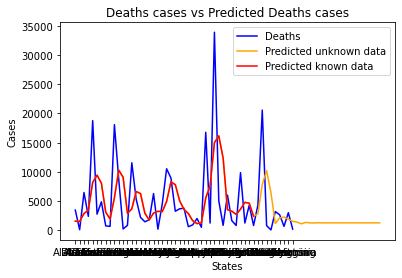

In [77]:
plt.xlabel('States')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Deaths', color='blue')
plt.plot(predictMADeaths, label='Predicted unknown data', color='orange')
plt.plot(predictMADeaths[:len(predictMADeaths)-100], label='Predicted known data', color='red')
plt.title('Deaths cases vs Predicted Deaths cases')
plt.legend()
plt.show()